In [1]:
import pandas as pd

df = pd.read_csv("Iris.csv", index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn. preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define the data for clustering
X = df.drop(columns=["Species"], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/oscarm524/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


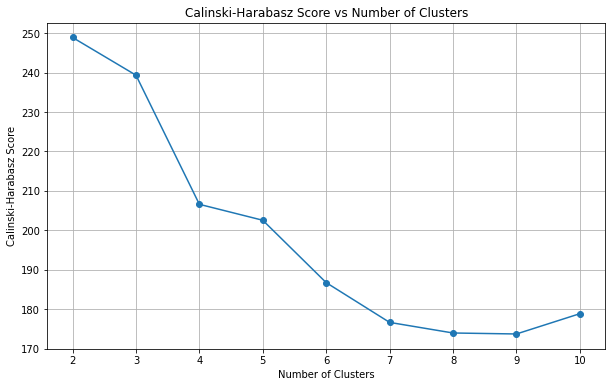

In [3]:
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

ch_scores = []

for i in range(2, 11):

    # Defining the KMeans model
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=42)
    kmeans.fit(X_scaled)

    # Calculate the Calinski-Harabasz score
    ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    ch_scores.append(ch_score)

# Plotting the Calinski-Harabasz scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show();

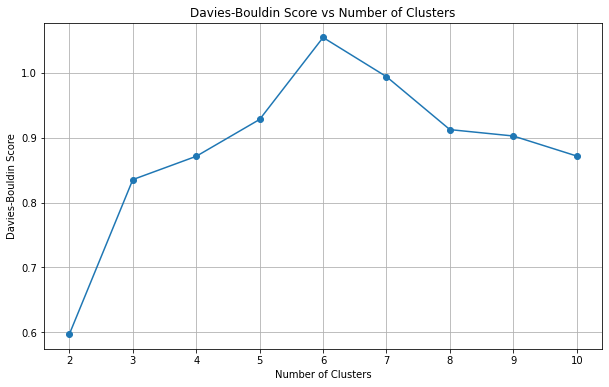

In [4]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for i in range(2, 11):
    
    # Defining the KMeans model
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=42)
    kmeans.fit(X_scaled)

    # Calculate the Davies-Bouldin score
    db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
    db_scores.append(db_score)

# Plotting the Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Score vs Number of Clusters') 
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show();

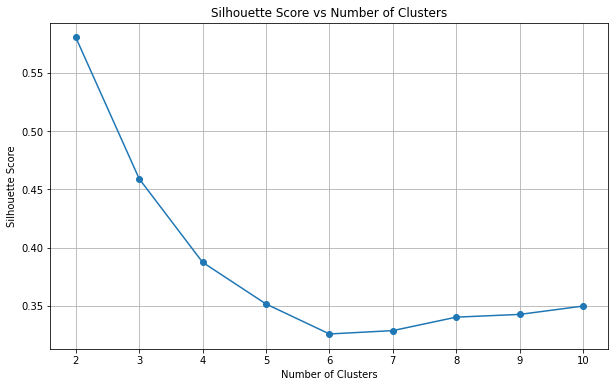

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    
    # Fit KMeans with different number of clusters
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=42)
    kmeans.fit(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show();